#Hello!
In this notebook, we will build our second ML/DL model using the all data to obtain a specific idea about the user.

##Import Data set from Google Drive

In [1]:
#Import library
import pandas as pd

In [3]:
#drive mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#verify the path
folder_path = "/content/drive/MyDrive/My_work/TuniHack_work"
!ls "/content/drive/MyDrive/My_work/TuniHack_work"

 data_for_model1.csv
 data_for_model2.csv
'Data_preparation&cleaning&FeatureSelection.ipynb'
 Final_data.csv
 Mental-Health-Questionnaire-2.0.csv
 Mental-Health-Survey-Form-responses.csv
 Model-A.ipynb
 Model-B.ipynb


In [5]:
#assign data 
data_path = folder_path + "/data_for_model2.csv"
#read data
data = pd.read_csv(data_path)
data.head()

,Unnamed: 0,Gender,Are you above 30 years of age?,Employment Status,City,How are you feeling today?,Have you been eating and sleeping well?,Is your sadness momentarily or has it been constant for a long time? (last month),At what time of the day are you extremely low?,How frequently have you had little pleasure or interest in the activities you usually enjoy?,...,conc_Yes,conc_maybe,conc_no,conc_yes,fbad_Maybe,fbad_No,fbad_Yes,fbad_maybe,fbad_no,fbad_yes
0,0,0,1,0,3,0,0,0,1,2,...,0,0,0,1,0,0,0,0,0,1
1,1,1,0,0,3,0,1,0,2,3,...,0,0,1,0,0,0,0,0,1,0
2,2,1,0,0,3,0,1,2,1,1,...,0,0,0,1,0,0,0,0,1,0
3,3,1,0,0,3,0,0,0,1,1,...,0,0,1,0,0,0,0,1,0,0
4,4,0,0,0,3,2,1,0,1,2,...,0,0,1,0,0,0,0,0,1,0


##Splitting/Scaling

In [6]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
import tensorflow as tf

In [7]:
y=data['Prediction_status'].copy()
X=data.drop('Prediction_status',axis=1).copy()

In [8]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=100)

##Training using ML algorithms

In [10]:
models = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
from sklearn.svm import LinearSVC
models['Support Vector Machines'] = LinearSVC()

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier()

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


accuracy, precision, recall, f1_scores = {}, {}, {}, {}

for key in models.keys():
    
    # Fit the classifier
    models[key].fit(X_train, y_train)
    
    # Make predictions
    predictions = models[key].predict(X_test)
    
    # Calculate metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)
    f1_scores[key] = f1_score(predictions, y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [12]:
df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall', 'F1-score'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()
df_model['F1-score'] = f1_scores.values()
df_model

,Accuracy,Precision,Recall,F1-score
Logistic Regression,0.809524,0.882353,0.714286,0.789474
Support Vector Machines,0.761905,0.823529,0.666667,0.736842
Decision Trees,0.642857,0.647059,0.550000,0.594595
Random Forest,0.880952,0.764706,0.928571,0.838710
Naive Bayes,0.571429,0.058824,0.333333,0.100000
K-Nearest Neighbor,0.761905,0.529412,0.818182,0.642857


##Training using Dl algorithms

In [13]:
X.shape

(209, 79)

In [14]:
print("Class Distribution (Positive to Negative): {:.1f}% / {:.1f}%".format(y_train.mean() * 100, (1 - y_train.mean()) * 100))

Class Distribution (Positive to Negative): 52.7% / 47.3%


In [15]:
inputs = tf.keras.Input(shape=(X.shape[1],))
x = tf.keras.layers.Dense(1024, activation='relu')(inputs)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs, outputs)


model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc')
    ]
)


batch_size = 64
epochs = 50

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=batch_size,
    verbose=0,
    epochs=epochs,
    callbacks=[
        tf.keras.callbacks.ReduceLROnPlateau()
    ]
)

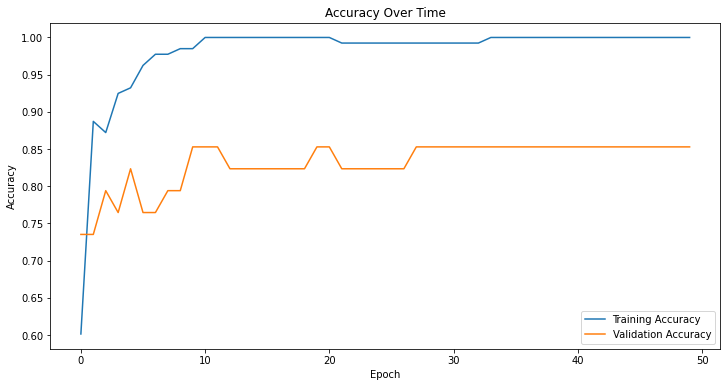

In [16]:
plt.figure(figsize=(12, 6))

plt.plot(range(epochs), history.history['accuracy'], label="Training Accuracy")
plt.plot(range(epochs), history.history['val_accuracy'], label="Validation Accuracy")

plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.legend()
plt.title("Accuracy Over Time")

plt.show()

In [17]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 11ms/step - loss: 0.8050 - accuracy: 0.7619 - auc: 0.8071


[0.8050174713134766, 0.761904776096344, 0.8070588707923889]

##Results Interpretation

In [18]:
# make a prediction
ynew = model.predict(X)

7/7 [==============================] - 0s 6ms/step


In [19]:
predicted=[]
for i in range(data.shape[0]):
    if ynew[i]>0.5:
        predicted.append(1)
    else:
        predicted.append(0)

In [20]:
#test_labels=[1,0,1,0,1,0]
test_labels=y
cm = confusion_matrix(y_true=test_labels, y_pred=predicted)
f1 = f1_score(y_true=test_labels, y_pred=predicted)
f1

0.9289099526066351

In [21]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [22]:
cm_plot_labels = ['Not Good!','Good!']


Confusion matrix, without normalization
[[96  8]
 [ 7 98]]


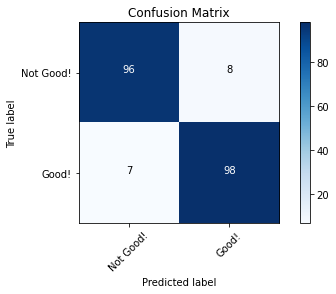

In [23]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')